## Multi-class classification

In [7]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

# Load MNIST dataset (8x8 digit images)
digits = datasets.load_digits()
X, y = digits.data, digits.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [8]:
# By default, SVC uses One-vs-One
svm_clf = SVC()
svm_clf.fit(X_train, y_train)

# Predict one digit
some_digit = X_test[0]
prediction = svm_clf.predict([some_digit])
print("Prediction:", prediction)

# Decision scores (one per class)
some_digit_scores = svm_clf.decision_function([some_digit])
print("Decision scores:", some_digit_scores)

# Highest score determines the predicted class
print("Predicted class (via argmax):", np.argmax(some_digit_scores))
print("Classes list:", svm_clf.classes_)

Prediction: [6]
Decision scores: [[3.84650681 4.89324828 0.74124969 0.73135315 6.94526632 4.86863787
  9.30601317 0.72987247 8.26383619 3.83940234]]
Predicted class (via argmax): 6
Classes list: [0 1 2 3 4 5 6 7 8 9]


In [9]:
# Force One-vs-Rest strategy
ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train, y_train)
print("OvR prediction:", ovr_clf.predict([some_digit]))

# Force One-vs-One strategy
ovo_clf = OneVsOneClassifier(SVC())
ovo_clf.fit(X_train, y_train)
print("OvO prediction:", ovo_clf.predict([some_digit]))

OvR prediction: [6]
OvO prediction: [6]


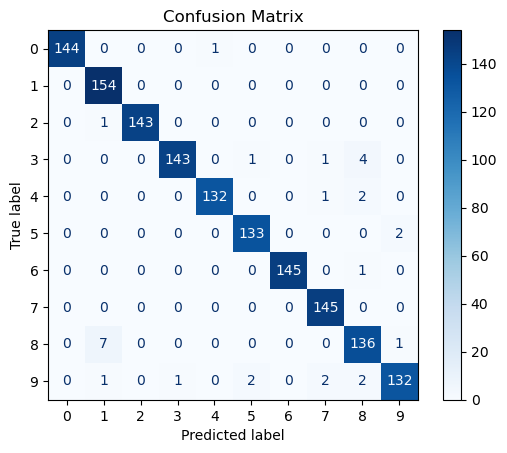

In [10]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Cross-validation predictions
y_pred = cross_val_predict(svm_clf, X_train, y_train, cv=3)

# Confusion Matrix
cm = confusion_matrix(y_train, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_clf.classes_)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix")
plt.show()

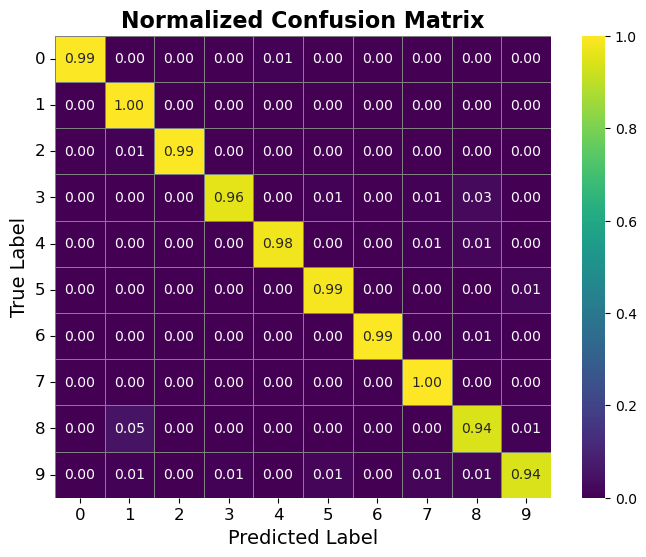

In [6]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Cross-validation predictions
y_pred = cross_val_predict(svm_clf, X_train, y_train, cv=3)

# Compute confusion matrix
cm = confusion_matrix(y_train, y_pred)
cm_normalized = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

# Plot fancy confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm_normalized, 
    annot=True, 
    fmt=".2f", 
    cmap="viridis", 
    xticklabels=svm_clf.classes_, 
    yticklabels=svm_clf.classes_,
    cbar=True,
    linewidths=0.5,
    linecolor="gray"
)
plt.title("Normalized Confusion Matrix", fontsize=16, weight="bold")
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12, rotation=0)
plt.show()


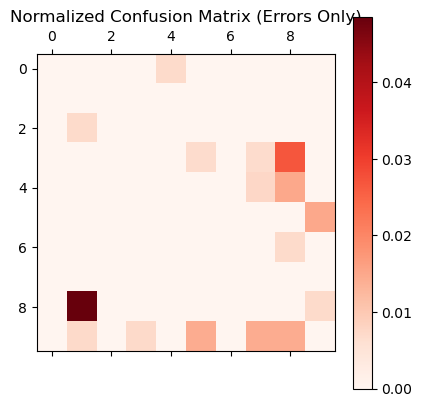

In [11]:
import numpy as np

row_sums = cm.sum(axis=1, keepdims=True)
cm_normalized = cm.astype('float') / row_sums

# Zero out the diagonal to focus on errors
np.fill_diagonal(cm_normalized, 0)

plt.matshow(cm_normalized, cmap="Reds")
plt.title("Normalized Confusion Matrix (Errors Only)")
plt.colorbar()
plt.show()

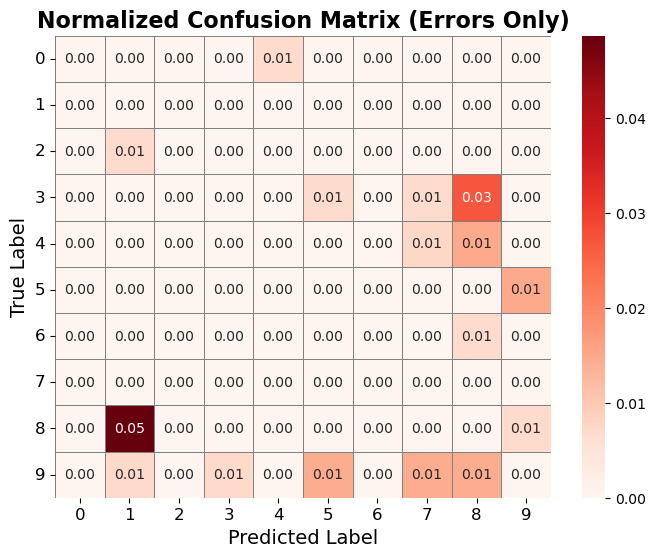

In [13]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Normalize confusion matrix
row_sums = cm.sum(axis=1, keepdims=True)
cm_normalized = cm.astype('float') / row_sums

# Zero out the diagonal to focus only on errors
np.fill_diagonal(cm_normalized, 0)

# Plot fancy heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm_normalized,
    annot=True,
    fmt=".2f",
    cmap="Reds",
    xticklabels=svm_clf.classes_,
    yticklabels=svm_clf.classes_,
    cbar=True,
    linewidths=0.5,
    linecolor="gray"
)

plt.title("Normalized Confusion Matrix (Errors Only)", fontsize=16, weight="bold")
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12, rotation=0)
plt.show()


## Multi-label classification

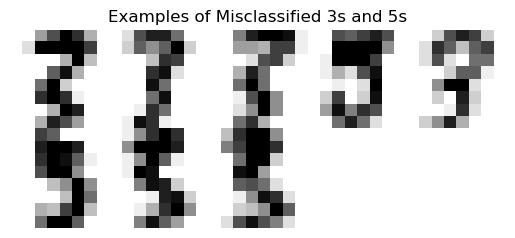

In [4]:
def plot_digits(instances, images_per_row=10):
    size = 8  # since MNIST digits here are 8x8
    images_per_row = min(len(instances), images_per_row)
    n_rows = (len(instances) - 1) // images_per_row + 1
    n_empty = n_rows * images_per_row - len(instances)
    padded = np.concatenate([instances, np.zeros((n_empty, size*size))], axis=0)
    rows = []
    for row in range(n_rows):
        r = padded[row * images_per_row : (row + 1) * images_per_row]
        rows.append(np.concatenate([img.reshape(size, size) for img in r], axis=1))
    image = np.concatenate(rows, axis=0)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

# Extract misclassified 3s and 5s
misclassified = (y_train != y_pred)
X_3_vs_5 = X_train[misclassified][(y_train[misclassified] == 3) | (y_train[misclassified] == 5)]

plot_digits(X_3_vs_5[:25], images_per_row=5)
plt.title("Examples of Misclassified 3s and 5s")
plt.show()


In [15]:
from sklearn.neighbors import KNeighborsClassifier

# Define multilabel targets
y_large = (y_train >= 7)  
y_odd   = (y_train % 2 == 1)  
y_multilabel = np.c_[y_large, y_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

some_digit = X_test[0]
print("Prediction:", knn_clf.predict([some_digit]))

Prediction: [[False False]]


In [17]:
from sklearn.metrics import f1_score

y_train_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)

# Compute average F1 score
print("Macro F1 score:", f1_score(y_multilabel, y_train_pred, average="macro"))

print("Weighted F1 score:", f1_score(y_multilabel, y_train_pred, average="weighted"))

Macro F1 score: 0.9812322062633952
Weighted F1 score: 0.9835646019267883


## Multi-output classification

In [18]:
np.random.seed(42)
noise_train = np.random.randint(0, 100, (len(X_train), 64))
noise_test  = np.random.randint(0, 100, (len(X_test), 64))

X_train_mod = X_train + noise_train
X_test_mod  = X_test + noise_test

y_train_mod = X_train 
y_test_mod  = X_test

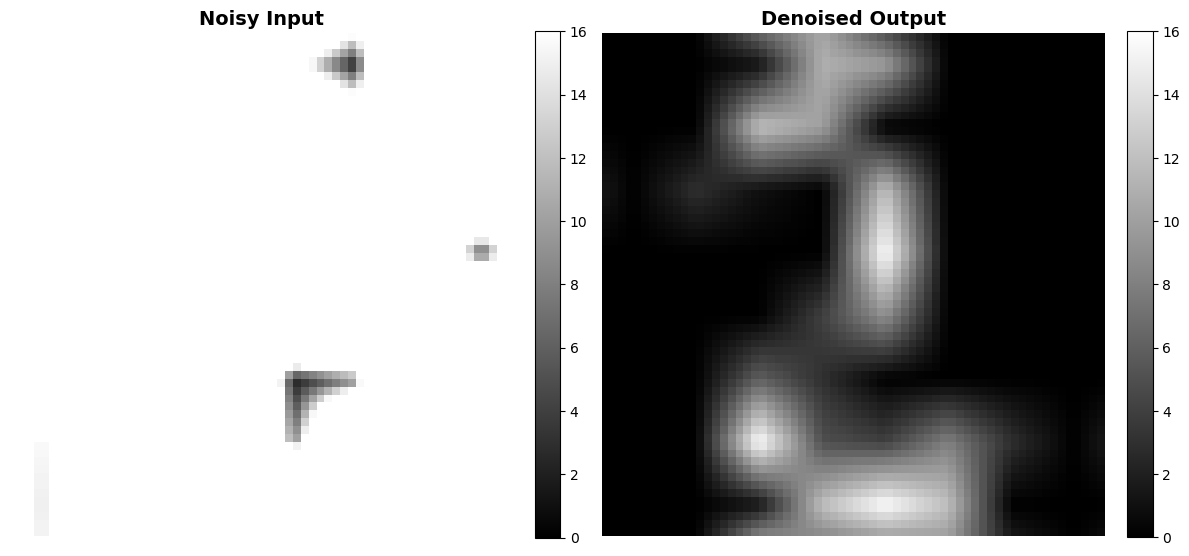

In [22]:
import matplotlib.pyplot as plt
from skimage.transform import resize
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Function to plot digit with zoom and optional colorbar
def plot_digit(data, ax, title="", scale=8, show_colorbar=True):
    image = data.reshape(8, 8)
    image_resized = resize(image, (8*scale, 8*scale), anti_aliasing=True)
    im = ax.imshow(image_resized, cmap="gray", interpolation="none", vmin=0, vmax=16)
    ax.set_title(title, fontsize=14, weight="bold")
    ax.axis("off")
    if show_colorbar:
        plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

# Predict denoised digit
some_index = 0
clean_digit = knn_clf.predict([X_test_mod[some_index]])[0]

# Plot side-by-side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

plot_digit(X_test_mod[some_index], axes[0], title="Noisy Input")
plot_digit(clean_digit, axes[1], title="Denoised Output")

# Add subtle borders for emphasis
for ax in axes:
    for spine in ax.spines.values():
        spine.set_edgecolor('blue')
        spine.set_linewidth(2)

plt.tight_layout()
plt.show()


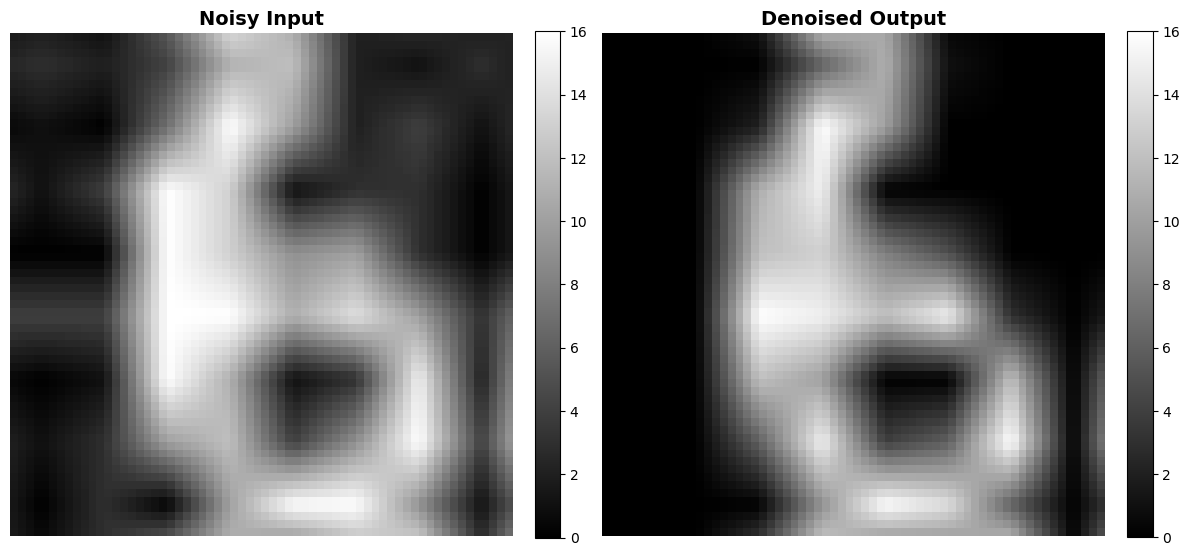

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier

# --- Add controlled noise to keep pixel values in [0,16] ---
np.random.seed(42)
noise_train = np.random.randint(0, 5, X_train.shape)  # smaller noise for clarity
noise_test  = np.random.randint(0, 5, X_test.shape)

X_train_mod = np.clip(X_train + noise_train, 0, 16)  # keep values in 0-16
X_test_mod  = np.clip(X_test + noise_test, 0, 16)

y_train_mod = X_train
y_test_mod  = X_test

# --- Train multi-output KNN ---
knn_clf = MultiOutputClassifier(KNeighborsClassifier(n_neighbors=3))
knn_clf.fit(X_train_mod, y_train_mod)

# --- Function to plot digit clearly ---
def plot_digit(data, ax, title="", scale=8, show_colorbar=True):
    image = data.reshape(8, 8)
    image_resized = resize(image, (8*scale, 8*scale), anti_aliasing=True)
    im = ax.imshow(image_resized, cmap="gray", interpolation="nearest", vmin=0, vmax=16)
    ax.set_title(title, fontsize=14, weight="bold")
    ax.axis("off")
    if show_colorbar:
        plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

# --- Predict denoised digit ---
some_index = 0
clean_digit = knn_clf.predict([X_test_mod[some_index]])[0]

# --- Plot side-by-side with clear digits ---
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

plot_digit(X_test_mod[some_index], axes[0], title="Noisy Input")
plot_digit(clean_digit, axes[1], title="Denoised Output")

# Add subtle borders for emphasis
for ax in axes:
    for spine in ax.spines.values():
        spine.set_edgecolor('blue')
        spine.set_linewidth(2)

plt.tight_layout()
plt.show()
